In [1]:
!python -m pip install --upgrade pip
!pip install tqdm

In [3]:
import tqdm
from concurrent.futures import ProcessPoolExecutor

# Performance Visualization of Jakobsen's Algorithm

## Setting Paramaters and Getting Plaintext

In [2]:
# Common Values
wordLengths = [10, 15, 20, 25, 50, 75, 100, 200, 300, 400, 500]
numberOfTrials = 100

In [ ]:
from src.utils.utils import selectPlainText

def getPlaintextSamples(length, numberOfSamples):

    plaintextSamples = []

    for _ in range(numberOfSamples):
        plaintextSamples.append(selectPlainText(length))
    
    return plaintextSamples

plaintextSamples = {}
for length in wordLengths:
    print("Getting plaintext samples of length", length, end = '\r')
    plaintextSamples[length] = getPlaintextSamples(length, numberOfTrials)

print(str(numberOfTrials), "plaintext samples gathered for lengths", ", ".join(wordLengths))

## Computing Data

In [ ]:
# Helper function to get results
def getResults(decryptionFunction, plaintextTests, spacesRemoved, max_workers=12):

    # Getting results of Jakobsen's with spaced queries
    results = []
    executor = ProcessPoolExecutor(max_workers=max_workers)

    for length, plaintextList in plaintextTests:
        jobQueue = []
        results[length] = []

        for plaintext in plaintextList:
            jobQueue.append(executor.submit(decryptionFunction, plaintext, spacesRemoved))

        for future in tqdm.tqdm(jobQueue, desc="Processing trials of length" + str(length)):
            results[length].append(future.result())

    executor.shutdown()
    return results

In [6]:
# Getting results of standard jakobsensAlgorithm on spaced plaintexts
from src.jakobsensAlgorithm import testJakobsens
resultsSpacedJakobsens = getResults(testJakobsens, plaintextSamples, False, max_workers=12)

Processing trials of length 500: 100%|██████████| 100/100 [00:07<00:00, 12.88it/s]


In [ ]:
resultsUnspacedJakobsens = getResults(testJakobsens, plaintextSamples, True, max_workers=12)

In [ ]:
# Helper function to get results
def getResultsRandomRestart(decryptionFunction, plaintextTests, numRestarts, spacesRemoved, max_workers=12):

    # Getting results of Jakobsen's with spaced queries
    results = []
    executor = ProcessPoolExecutor(max_workers=max_workers)

    for length, plaintextList in plaintextTests:
        jobQueue = []
        results[length] = []

        for plaintext in plaintextList:
            jobQueue.append(executor.submit(decryptionFunction, plaintext, numRestarts, spacesRemoved))

        for future in tqdm.tqdm(jobQueue, desc="Processing trials of length" + str(length)):
            results[length].append(future.result())

    executor.shutdown()
    return results

In [ ]:
from src.jakobsensAlgorithmRandomStart import testJakobsensRandomRestart

# Getting results of standard jakobsensAlgorithm on unspaced plaintexts
resultsUnspacedJakobsensRandomRestart = getResults(testJakobsensRandomRestart, plaintextSamples, 5, True, max_workers=12)

In [ ]:
resultsSpacedJakobsensRandomRestart = getResults(testJakobsensRandomRestart, plaintextSamples, 5, False, max_workers=12)

## Formatting and Aggregating Results 

In [2]:
def formatResults(resultsDictionary):

    formattedResultsDictionary = {}
    for length, results in resultsDictionary.items():
        letterResults = [lettersFound for lettersFound, _ in results]
        percentResults = [percentDecoded for _, percentDecoded in results]
        formattedResultsDictionary[length] = (sum(letterResults)/len(letterResults), sum(percentResults)/len(percentResults))
    
    return formattedResultsDictionary

In [1]:
formattedResultsSpacedJakobsens = formatResults(resultsSpacedJakobsens)
formattedResultsUnspacedJakobsens = formatResults(resultsUnspacedJakobsens)
formattedResultsSpacedJakobsensRandomRestart = formatResults(resultsSpacedJakobsensRandomRestart)
formattedResultsUnspacedJakobsensRandomRestart = formatResults(resultsUnspacedJakobsensRandomRestart)

NameError: name 'formatResults' is not defined

## Visualizations

In [ ]:
# TODO: Create a function to make boxplots

In [ ]:
resultsDictionaries = [formattedResultsSpacedJakobsens, formattedResultsUnspacedJakobsens, formattedResultsSpacedJakobsensRandomRestart, formattedResultsUnspacedJakobsensRandomRestart]
resultsLabels = ["Spaced Jakobsens", "Spaceless Jakobsons", "Spaced Random Restart", "Spaceless Random Restart"]
resultsLettersSolved = []
resultsPercentSolved = []

for resultsDict in resultsDictionaries:
    lettersSolved = []
    percentSolved = []
    for length, results in resultsDict.items():
        lettersSolved.append(results[0])
        percentSolved.append(results[1])
    resultsLettersSolved.append(lettersSolved)
    resultsPercentSolved.append(percentSolved)

In [ ]:
import matplotlib.pyplot as plt

def graphLettersSolved(wordLengths, lettersFound, lettersFoundLabels): #letters, letters_spaced):

    for i in range(len(lettersFound)):
        plt.plot(wordLengths, lettersFound[i], marker = ".", linestyle = "-", label = lettersFoundLabels[i])
    plt.xlabel('Number of Ciphertext Words')
    plt.ylabel('Correctly Guessed Letters')
    plt.title('Letters Found v. Input Length')
    plt.grid(True)
    plt.legend()
    plt.show()

graphLettersSolved(wordLengths, resultsLettersSolved, resultsLabels)

In [ ]:
import matplotlib.pyplot as plt

def graphPlaintextSolved(wordLengths, plaintextFound, plaintextFoundLabels): #letters, letters_spaced):

    for i in range(len(plaintextFound)):
        plt.plot(wordLengths, plaintextFound[i], marker = ".", linestyle='-', label = plaintextFoundLabels[i])
    plt.xlabel('Number of Ciphertext Words')
    plt.ylabel('Plaintext Decoded (%)')
    plt.title('Plaintext Found v. Input Length')
    plt.grid(True)
    plt.legend()
    plt.show()
graphLettersSolved(wordLengths, resultsLettersSolved, resultsLabels)

[1.99, 2.89, 3.57, 4.01, 7.07, 10.91, 13.65, 18.77, 22.07, 23.66, 22.82]
[3.66, 4.16, 5.43, 7.24, 14.01, 16.14, 19.65, 23.31, 24.15, 24.4, 25.03]


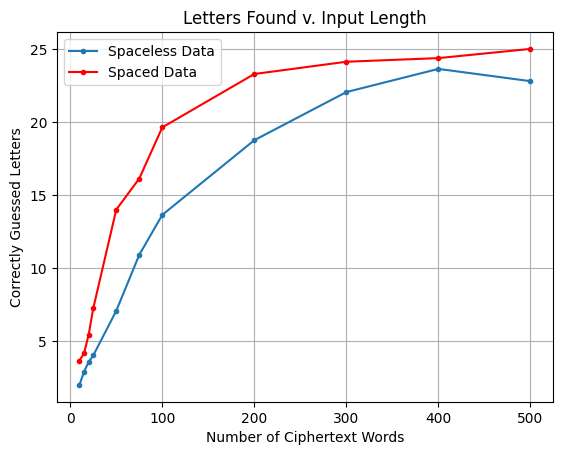

[1.99, 2.89, 3.57, 4.01, 7.07, 10.91, 13.65]
[3.66, 4.16, 5.43, 7.24, 14.01, 16.14, 19.65]


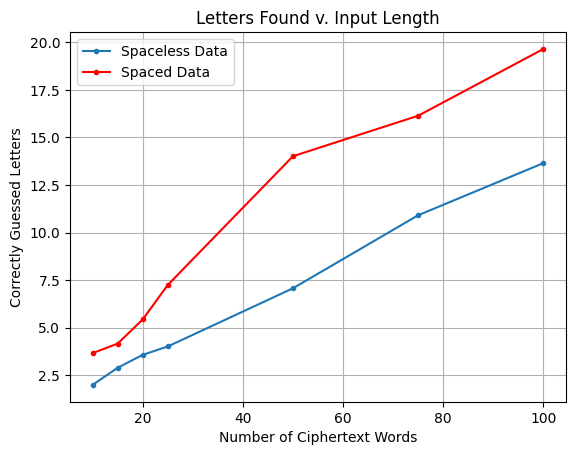

In [55]:
import matplotlib.pyplot as plt

def plot_word_length_percentage(word_lengths, letters, letters_spaced):
    print(letters)
    print(letters_spaced)
    plt.plot(word_lengths, letters, marker=".", linestyle='solid', label='Spaceless Data')
    plt.plot(word_lengths, letters_spaced, marker='.', linestyle='solid', label='Spaced Data', color='red')
    plt.xlabel('Number of Ciphertext Words')
    plt.ylabel('Correctly Guessed Letters')
    plt.title('Letters Found v. Input Length')
    plt.grid(True)
    plt.legend()
    plt.show()

letters_spaceless = []
for length, results in formattedResultsSpaceless.items():
    letters_spaceless.append(results[0])

letters_spaced = []
for length, results in formattedResultsSpaced.items():
    letters_spaced.append(results[0])

plot_word_length_percentage(wordLengths, letters_spaceless, letters_spaced)
plot_word_length_percentage(wordLengths[:7], letters_spaceless[:7], letters_spaced[:7])

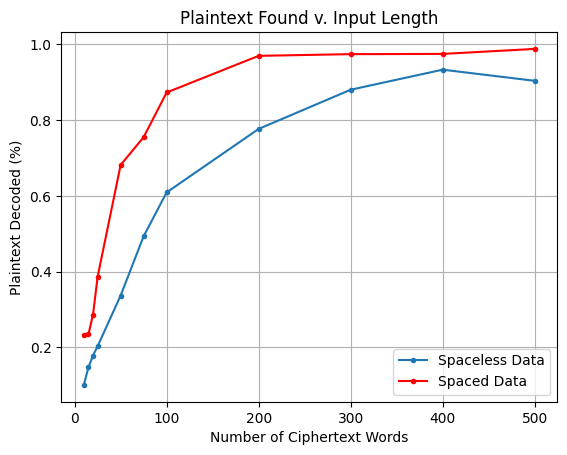

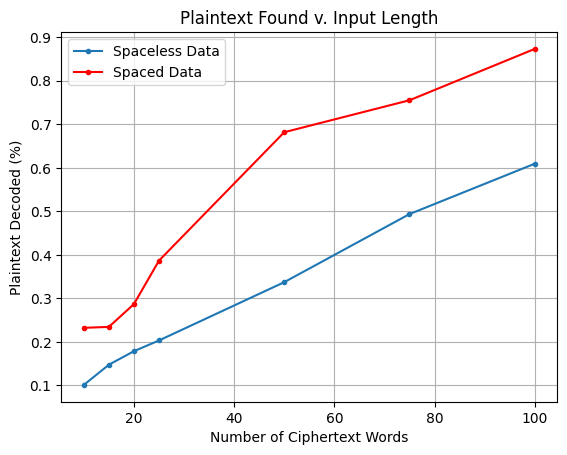

In [53]:
import matplotlib.pyplot as plt

#def plotComparative(xLabel, yLabel, xArray, ySpaced, ySpaceless):

def plot_word_length_percentage(word_lengths, accuracy_spaceless, accuracy_spaced):
    #print(accuracy_spaceless)
    #print(accuracy_spaced)
    plt.plot(word_lengths, accuracy_spaceless, marker='.', linestyle='-', label='Spaceless Data')
    plt.plot(word_lengths, accuracy_spaced, marker='.', linestyle='-', label='Spaced Data', color='red')
    plt.xlabel('Number of Ciphertext Words')
    plt.ylabel('Plaintext Decoded (%)')
    plt.title('Plaintext Found v. Input Length')
    plt.grid(True)
    plt.legend()
    plt.show()

accuracy_spaceless = []
for length, results in formattedResultsSpaceless.items():
    accuracy_spaceless.append(results[1])

accuracy_spaced = []
for length, results in formattedResultsSpaced.items():
    accuracy_spaced.append(results[1])

plot_word_length_percentage(wordLengths, accuracy_spaceless, accuracy_spaced)
plot_word_length_percentage(wordLengths[:7], accuracy_spaceless[:7], accuracy_spaced[:7])